# Proyecto
Prediccion de aceptación de cupones para viajeros con modelos de *clasificación*.



# Grupo E
• Gereda Hernandez, Davis <br>
• Leon Gavino, Ivan Santos <br>
• Mauricio Salazar, Josue Angel

# Dataset


Usaremos el conjunto de datos "In-vehicle coupon recommendation Data Set", el cual está disponible los siguientes enlaces:
<br/>
<br/>
https://www.kaggle.com/datasets/mathurinache/invehicle-coupon-recommendation
<br/>
https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation
<br/>
<br/>
Nuestro objetivo será predecir la aceptación de los cupones por parte de los conductores que se encuentran realizando turismo una determinada ciudad de nuestro país o lugares cercanos.

**Descripción de la data:**

>Variable | Definition | Type | Values
>--- | --- | --- | ---
>destination | Destino del conductor | categorical | No Urgent Place, Home, Work
>passanger | Pasajeros que se encuentran en el auto | categorical | Alone, Friend(s), Kid(s), Partner
>weather | Clima | categorical | Sunny, Rainy, Snowy
>temperature | Temperatura | numeric | 55, 80, 30
>time | Hora | categorical | 2PM, 10AM, 6PM, 7AM, 10PM
>coupon | Tipo de cupón | categorical |  Restaurant(<20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)
>expiration | Tiempo de expiración del cupón. Expira en 1 días o 2 horas | categorical | 1d, 2h
>gender | Género del conductor | categorical | Female, Male
>age | Edad del conductor| categorical | 21, 46, 26, 31, 41, 50plus, 36, below21
>maritalStatus | Estado Civil | categorical | Unmarried partner, Single, Married partner, Divorced, Widowed
>has_Children | ¿Tiene hijos? | numeric | 1, 0
>education | Nivel educativo | categorical | Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School.
>occupation | Ocupación | categorical | Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
>income | Ingresos | categorical | $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499, $50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500
>Bar | ¿Cuántas veces vas a un bar al mes? | categorical | never, less1, 1~3, gt8, nan4~8
>CoffeeHouse | ¿Cuántas veces vas a una cafetería cada mes? | categorical | never, less1, 4~8, 1~3, gt8, nan
>CarryAway | ¿Cuántas veces al mes recibes comida para llevar? | categorical | n4~8, 1~3, gt8, less1, never
>RestaurantLessThan20 | ¿Cuántas veces vas a un restaurante con un gasto promedio por persona de menos de 20 cada mes? | categorical | 4~8, 1~3, less1, gt8, never
>Restaurant20To50 | ¿Cuántas veces vas a un restaurante con un gasto promedio por persona de $20 - $50 cada mes? | categorical | 1~3, less1, never, gt8, 4~8, nan
>toCoupon_GEQ15min | La distancia en automóvil al restaurante/bar para usar el cupón es mayor a 15 minutos | numeric | 0, 1
>toCoupon_GEQ25min | La distancia en automóvil al restaurante/bar para usar el cupón es mayor a 25 minutos | numeric | 0, 1
>direction_same | Si el restaurante/bar está en la misma dirección que su destino actual | numeric | 0, 1
>direction_opp | Si el restaurante/bar está en la misma dirección que su destino actual | numeric | 1, 0
>Y | Si se acepta el cupón | numeric | 1, 0

##Importación de Librerías

In [17]:
#Importamos las librerías necesarias para la importación, visualización y entrenamiento del dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, plot_confusion_matrix, classification_report
from pprint import pprint

pd.set_option("display.max_columns", 50)

%matplotlib inline

##Importación del Dataset

Hemos alojado el dataset "In-vehicle coupon recommendation Data Set" descargado del enlace de Kaggle en un drive compartido para una rápida descarga del mismo.

In [ ]:
#Indicamos el link del dataset que se encuentra en el drive compartido del grupo
data_link = "https://drive.google.com/uc?id=1-4nWuRu_X8q9PA3DzSSW9CdfP_4etFK0&export=download"

In [ ]:
#Descargamos el archivo excel y asignamos al dataset de trabajo
dataset = pd.read_csv(data_link)

In [16]:
#Visualizamos los tipos de datos de conforman el dataset inicial
dataset.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

##Revisión del Dataset

In [ ]:
#Tamaño del dataset (registros, variables).
dataset.shape

(12684, 26)

In [ ]:
#Vemos los primeros registros del dataset
dataset.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [19]:
#Verificamos si existen registros únicos por cada columna (variables). Expersado en porcentajes. Mientras más cercano el valor a 1 significa que tiene más filas (registros) únicos
dataset.nunique() / len(dataset)

destination             0.000237
passanger               0.000315
weather                 0.000237
temperature             0.000237
time                    0.000394
coupon                  0.000394
expiration              0.000158
gender                  0.000158
age                     0.000631
maritalStatus           0.000394
has_children            0.000158
education               0.000473
occupation              0.001971
income                  0.000710
car                     0.000394
Bar                     0.000394
CoffeeHouse             0.000394
CarryAway               0.000394
RestaurantLessThan20    0.000394
Restaurant20To50        0.000394
toCoupon_GEQ5min        0.000079
toCoupon_GEQ15min       0.000158
toCoupon_GEQ25min       0.000158
direction_same          0.000158
direction_opp           0.000158
Y                       0.000158
dtype: float64

De la verificación de registros únicos notamos que no es necesario aún eliminar variables dado que no existen altas cantidades de registros únicos por columnas.

In [21]:
#Verificamos si existen registros nulos. Expersado en porcentajes.
dataset.isna().sum() / len(dataset)

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64

De la verificación de registros nulos por variable notamos que la variable "car" un 99% de valores nulos por lo tanto es necesario eliminarlo. Asimismo,existen columnas con un bajo nivel de nulos los cuales se serán completados con el valor de la mediana de la columna en la etapa de pre-procesamiento.

##Pre-procesamiento del Dataset


Para el pre-procesamiento hemos tomado los criterios utilizados en el paper [6] referenciado en nuestro informe. Asimismo, hemos usado la técnica aprendida en clase (caso Titanic) para la conversión de variables categóricas a numéricas a través de indexación. <br>
La referencia del paper mencionado anteriormente es el siguiente: <br>
[6] D. R. Hermawan, M. Fahrio Ghanial Fatihah, L. Kurniawati, and
A. Helen, “Comparative Study of J48 Decision Tree Classification
Algorithm, Random Tree, and Random Forest on In-Vehicle CouponRecommendation Data,” in 2021 International Conference on Artificial Intelligence and Big Data Analytics, 2021, pp. 1–6. doi:
10.1109/ICAIBDA53487.2021.968970.

In [22]:
#Creamos el método de pre-procesamiento aplicando criterios del paper [6] y lo aprendido en clase en el caso Titanic.
def preprocess_dataset(dataset, save_metadata=True):
  preprocessed_dataset = dataset.copy()
  
  #Eliminamos la variable "toCoupon_GEQ5min"
  preprocessed_dataset.drop("toCoupon_GEQ5min", axis=1, inplace=True)

  #Eliminamos la variable "direction_same"
  preprocessed_dataset.drop("direction_same", axis=1, inplace=True)

  #Determinamos aquellas variables que tengan un porcentaje de registros nulos por cada variable mayor al valor de 0.7
  threshold = 0.7
  null_percentages = preprocessed_dataset.isna().sum() / len(preprocessed_dataset)
  criteria = null_percentages > threshold
  columns_to_filter = null_percentages[criteria].keys()

  #Eliminamos las variables seleccionadas en el paso anterior
  preprocessed_dataset.drop(columns_to_filter, axis=1, inplace=True)

  #Eliminamos los registros duplicados
  preprocessed_dataset.drop_duplicates(keep="first", inplace=True)

  #Determinamos que variables son del tipo númerico y cuales son categóricas
  numeric_columns = list()
  categorical_columns = list()
  dictionary_of_columns_with_index_to_categorical = dict()
  dictionary_of_columns_with_categorical_to_index = dict()

  for column in preprocessed_dataset:
      #Determinamos si la variable es numérica o no
      if pd.api.types.is_numeric_dtype(preprocessed_dataset[column]):
        numeric_columns.append(column)
      else:
        #Modificamos el tipo de dato de la variable mediante "astype"
        preprocessed_dataset[column] = preprocessed_dataset[column].astype("category")

        #Verificamos si el tipo de dato de la variable fue transformado a categórico correctamente
        if not pd.api.types.is_categorical_dtype(preprocessed_dataset[column]):
          raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

        dictionary_of_columns_with_index_to_categorical[column] = dict()
        dictionary_of_columns_with_categorical_to_index[column] = dict()
        
        #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la variable y guardamos esa información en los diccionarios
        for index, category in enumerate(preprocessed_dataset[column].cat.categories):
          dictionary_of_columns_with_index_to_categorical[column][index] = category
          dictionary_of_columns_with_categorical_to_index[column][category] = index
        
        categorical_columns.append(column)
    
  #Reemplazamos los nulos con la mediana sólo de aquellas variables numéricas
  median_of_numeric_columns = preprocessed_dataset[numeric_columns].median()

  preprocessed_dataset[numeric_columns] = preprocessed_dataset[numeric_columns].fillna(median_of_numeric_columns)

  #Transformamos a números los valores (categorías) de las variables categóricas sin considerar los nulos
  preprocessed_dataset.replace(dictionary_of_columns_with_categorical_to_index, inplace=True)

  #Generamos una nueva lista de variables categóricas y las variables eliminadas por tener un porcentaje alto de registros nulos
  categorical_columns_filtered = categorical_columns[:]
  
  if len(categorical_columns_filtered) > 0:
    #Reemplazamos los nulos con la mediana para todas las variables y las variables eliminadas por tener un porcentaje alto de registros nulos
    median_of_categorical_columns = preprocessed_dataset[categorical_columns_filtered].median()

    preprocessed_dataset[categorical_columns_filtered] = preprocessed_dataset[categorical_columns_filtered].fillna(median_of_categorical_columns)
  
  if save_metadata:
    #Guardamos información que consideremos imporante. El formato pickle nos permite guardar objetos de python
    with open("numeric_columns.pkl", "wb") as f:
      pickle.dump(numeric_columns, f)
    
    with open("categorical_columns.pkl", "wb") as f:
      pickle.dump(categorical_columns, f)
    
    with open("dictionary_of_columns_with_index_to_categorical.pkl", "wb") as f:
      pickle.dump(dictionary_of_columns_with_index_to_categorical, f)
    
    with open("dictionary_of_columns_with_categorical_to_index.pkl", "wb") as f:
      pickle.dump(dictionary_of_columns_with_categorical_to_index, f)
      
  return preprocessed_dataset

In [23]:
#Preprocesamos los datos usando el método creado para dicho fin
preprocessed_dataset = preprocess_dataset(dataset)

In [24]:
#Guardamos nuestro dataset pre-procesado en formato pickle
preprocessed_dataset.to_pickle("preprocessed_dataset_in_vehicle_train.pkl")

In [26]:
#Visualizamos la estructura del dataset preprocesado. Vemos que se eliminaron 3 variables (car, toCoupon_GEQ5min y direction_same).
preprocessed_dataset.shape

(12610, 23)

In [25]:
#Visualizamos los primeros valores del dataset y notamos que todas la variables categóricas fueron convertidas a numéricas. Este dataset es el que usaremos para el entrenamiento.
preprocessed_dataset.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_opp,Y
0,1,0,2,55,2,4,0,0,0,3,1,5,24,3,4.0,4.0,1.0,1.0,0.0,0,0,1,1
1,1,1,2,80,0,2,1,0,0,3,1,5,24,3,4.0,4.0,1.0,1.0,0.0,0,0,1,0
2,1,1,2,80,0,1,1,0,0,3,1,5,24,3,4.0,4.0,1.0,1.0,0.0,1,0,1,1
3,1,1,2,80,2,2,1,0,0,3,1,5,24,3,4.0,4.0,1.0,1.0,0.0,1,0,1,0
4,1,1,2,80,2,2,0,0,0,3,1,5,24,3,4.0,4.0,1.0,1.0,0.0,1,0,1,0


In [27]:
#Cargamos los datos previamente guardados
with open("numeric_columns.pkl", "rb") as f:
    numeric_columns = pickle.load(f)

with open("categorical_columns.pkl", "rb") as f:
  categorical_columns = pickle.load(f)

with open("dictionary_of_columns_with_index_to_categorical.pkl", "rb") as f:
  dictionary_of_columns_with_index_to_categorical = pickle.load(f)

with open("dictionary_of_columns_with_categorical_to_index.pkl", "rb") as f:
  dictionary_of_columns_with_categorical_to_index = pickle.load(f)

preprocessed_dataset = pd.read_pickle("preprocessed_dataset_in_vehicle_train.pkl")

In [ ]:
#Vemos las columnas numéricas que se guardaron durante el procesamiento en caso lo necesitemos posteriormente.
numeric_columns

['temperature',
 'has_children',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_opp',
 'Y']

In [ ]:
#Vemos las columnas categóricas que se guardaron durante el procesamiento en caso lo necesitemos posteriormente.
categorical_columns

['destination',
 'passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [28]:
#Vemos el diccionario de índices que generamos y guardamos durante el pre-procesamiento en la conversión de variables categóricas a numéricas.
dictionary_of_columns_with_index_to_categorical

{'Bar': {0: '1~3', 1: '4~8', 2: 'gt8', 3: 'less1', 4: 'never'},
 'CarryAway': {0: '1~3', 1: '4~8', 2: 'gt8', 3: 'less1', 4: 'never'},
 'CoffeeHouse': {0: '1~3', 1: '4~8', 2: 'gt8', 3: 'less1', 4: 'never'},
 'Restaurant20To50': {0: '1~3', 1: '4~8', 2: 'gt8', 3: 'less1', 4: 'never'},
 'RestaurantLessThan20': {0: '1~3',
  1: '4~8',
  2: 'gt8',
  3: 'less1',
  4: 'never'},
 'age': {0: '21',
  1: '26',
  2: '31',
  3: '36',
  4: '41',
  5: '46',
  6: '50plus',
  7: 'below21'},
 'coupon': {0: 'Bar',
  1: 'Carry out & Take away',
  2: 'Coffee House',
  3: 'Restaurant(20-50)',
  4: 'Restaurant(<20)'},
 'destination': {0: 'Home', 1: 'No Urgent Place', 2: 'Work'},
 'education': {0: 'Associates degree',
  1: 'Bachelors degree',
  2: 'Graduate degree (Masters or Doctorate)',
  3: 'High School Graduate',
  4: 'Some High School',
  5: 'Some college - no degree'},
 'expiration': {0: '1d', 1: '2h'},
 'gender': {0: 'Female', 1: 'Male'},
 'income': {0: '$100000 or More',
  1: '$12500 - $24999',
  2: '$2

## Visualizamos la data

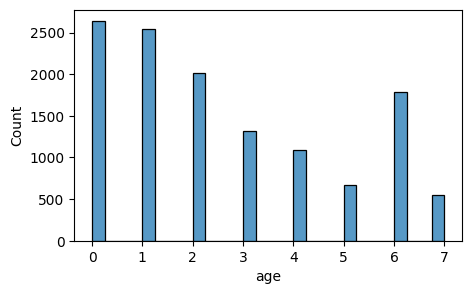

In [ ]:
#Realizamos una primera visualización de los datos de la variable "age".
width = 5
height = 3

plt.style.use("default")

plt.figure(figsize=(width, height))

sns.histplot(preprocessed_dataset['age'], )

plt.show()

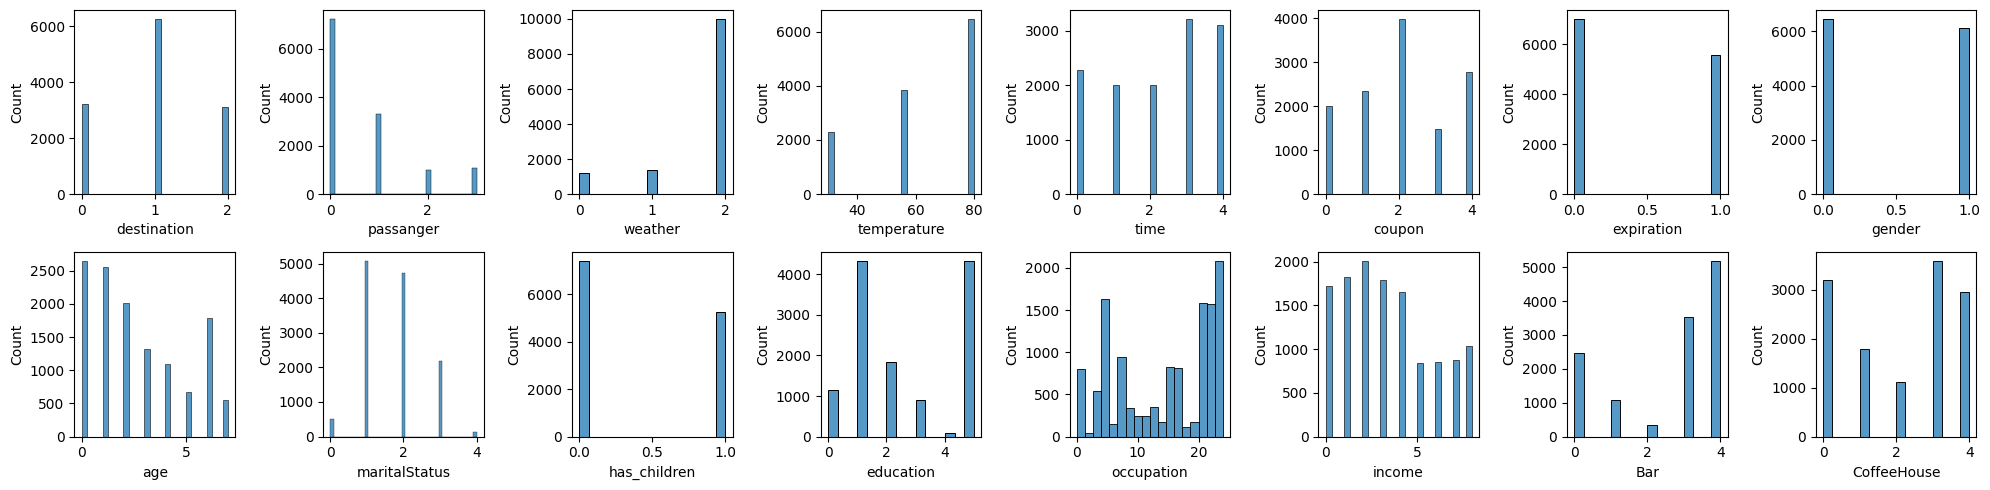

In [ ]:
#Visualizamos todas las variables que conforman el dataset pre-procesado.
width = 20
height = 5

plt.style.use("default")

figure, axes = plt.subplots(nrows=2, ncols=8, figsize=(width, height))

for column, axe in zip(preprocessed_dataset, axes.flatten()):
    sns.histplot(preprocessed_dataset[column], ax=axe)
    
plt.tight_layout()

De los gráficos notamos que los datos se encuentran correctamente distribuidos por lo que no será necesario normalizarlos y/o escalarlos.

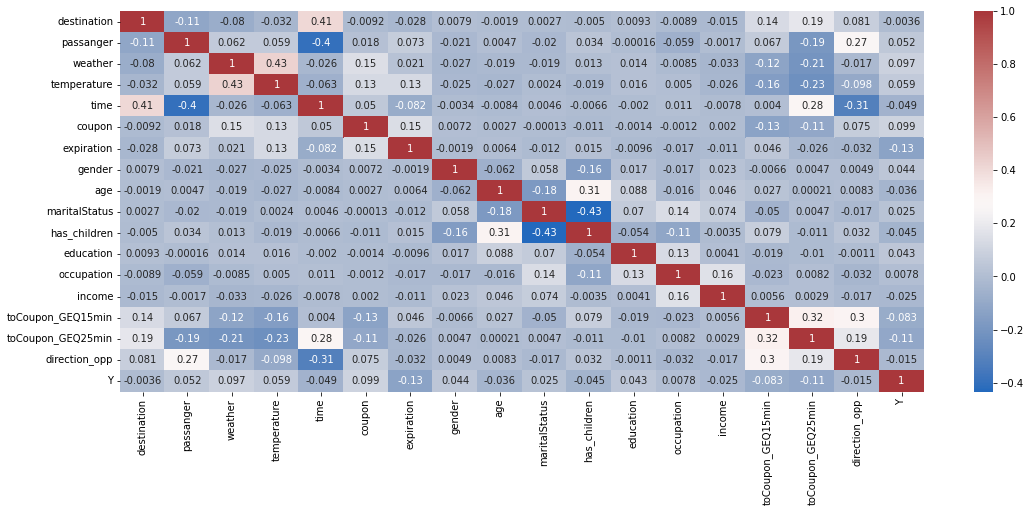

In [29]:
#Vemos el mapa de calor del dataset pre-procesado indicando la correlación de las variables.
plt.figure(figsize=[18,7])
cmap = sns.color_palette('vlag', as_cmap=True)
sns.heatmap(preprocessed_dataset.select_dtypes('int64', 'float64').corr(), cmap=cmap, annot=True)
plt.show()

## Dividimos la data

In [30]:
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar nuestro modelo.
x = preprocessed_dataset.drop("Y", axis=1)

y = preprocessed_dataset["Y"]

In [31]:
#Mediante el método "train_test_split" usaremos el 20% de la data para probar el modelo. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [35]:
#Vemos la cantidad de registros para entrenamiento y pruebas.
print(f"Train shape: {x_train.shape}")
print(f"Test shape: {x_test.shape}")

Train shape: (10088, 22)
Test shape: (2522, 22)


El entrenamiento de nuestro modelo lo realizaremos usando 10,088 registros que contienen 22 variables, luego estos serán validados con un conjunto de datos de prueba de 2,522 registros que indicarán la exactitud alcanzada por nuestro modelo.

##Entrenamiento del modelo

El entrenamiento lo realizaremos usando el modelo XGBoost dado que es el modelo que obtuvo la mejor exactitud de las experimientaciones que realizamos con distintos modelos como: Árbol de decición, KNN, Random Forest, SVM, Regresión Logística. También realizamos experimentaciones con modelos de esamble por votación y apilamiento. Las experimentaciones realizadas por los integrantes del grupo se encuentran en el Github (https://github.com/DavisGereda/Proyecto-ML) carpeta <b>/modelos</b>, los mismos que se detallan en un excel <b>_Resultados Experimentos.xlsx</b> <br>
De las experimientaciones realizados por el grupo E el modelo con mejor exactitud fue XGBoost. <br>
La comparación de exactitud fue en base al paper base del proyecto en la que se obtuvo 77,09% de exactitud.

##**XGBoost**

In [39]:
#Importamos las librerías para entrenar el modelo XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn import metrics
import time

## Tuneo de Hiperparámetros

Para el entrenamiento decidimos realizar una búsqueda de los mejores parámetros para nuestro modelo XGBoost, para ello nos basamos de la referencia de [Jayanta Kumar](https://jayant017.medium.com/hyperparameter-tuning-in-xgboost-using-randomizedsearchcv-88fcb5b58a73).


In [40]:
#Buscamos los mejores parámetros para entrenar el modelo.
clf_xgb = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

### Se realiza la evaluación del modelo con los mejores parámetros encontrados con el modelo **RandomizedSearchCV**.

In [65]:
#Realizamos el entrenamiento del modelo aplicando la búsqueda de mejores parámetros.
t0 = time.time()

rs_clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 10,  
                         n_iter = 10, 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

rs_clf.fit(x_train, y_train)

t1 = time.time()


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [74]:
#Vemos el tiempo de ejecución del modelo de entrenamiento en minutos.
minutos = (t1-t0)/60
print(f"Tiempo ejecución: {minutos:.4} minutos")

Tiempo ejecución: 10.26 minutos


In [67]:
#Vemos el mejor score encontrado en la búsqueda de mejores parámetros y el entrenamiento.
best_score = rs_clf.best_score_
pprint("Best score: {}".format(best_score))

'Best score: 0.8319248091087237'


Hemos encontrado un Score del 83.2 %

In [68]:
#Consultamos los mejores parámetros encontrados.
best_params = rs_clf.best_params_
pprint("Best params: ")
for param_name in sorted(best_params.keys()):
    pprint('%s: %r' % (param_name, best_params[param_name]))

'Best params: '
'colsample_bytree: 0.6433202217694323'
'learning_rate: 0.1651701279540872'
'max_depth: 8'
'min_child_weight: 1'
'n_estimators: 213'
'subsample: 0.8974166008989073'


In [69]:
#Vemos el score del conjunto de datos de entrenamiento
rs_clf.score(x_train,y_train)

0.9999118182096258

In [70]:
#Vemos el score del conjunto de datos de pruebas
rs_clf.score(x_test,y_test)

0.8305950919184407

In [71]:
#Vemos la exactitud (accuracy) obtenida por el modelo
print(f'Exactitud de XGBoost: Entrenamiento {rs_clf.score(x_train, y_train):.03f} || Pruebas {rs_clf.score(x_test, y_test):.03f}',  )

Exactitud de XGBoost: Entrenamiento 1.000 || Pruebas 0.831


##El accuracy obtenido por el modelo es de 83.0%

## Curva ROC
Generamos el gráfico de la curva ROC para el entrenamiento realizado.

AUC = 0.8305950919184407


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


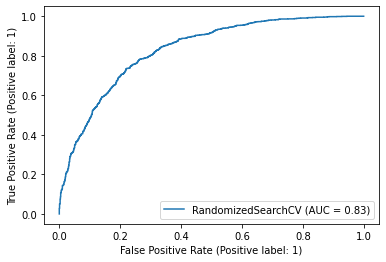

In [75]:
# Cálculo del AUC y gráfica de la Curva ROC
y_pred_val_Xgb = rs_clf.predict_proba(x_test)[:,1]
auc_roc_Xgb = metrics.roc_auc_score(y_test, y_pred_val_Xgb)
print('AUC =', auc_roc_Xgb)

metrics.plot_roc_curve(rs_clf, x_test, y_test)
plt.show()

En base al modelo evaluado se obtiene un AUC= 0.83

## Feature Importance


Determinamos cuales son las variable más importantes obtenidas del entrenamiento.

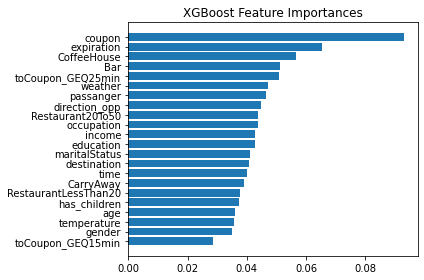

In [76]:
feature_names = x_train.columns.values
tree_feature_importances = rs_clf.best_estimator_.feature_importances_
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("XGBoost Feature Importances")
fig.tight_layout()
plt.show()

In [77]:
importances = pd.DataFrame({"columns":x_train.columns, "importances":rs_clf.best_estimator_.feature_importances_}).sort_values("importances", ascending=False)
importances.style.bar()

,columns,importances
5,coupon,0.093010
6,expiration,0.065337
15,CoffeeHouse,0.056496
14,Bar,0.051361
20,toCoupon_GEQ25min,0.050889
2,weather,0.047314
1,passanger,0.046401
21,direction_opp,0.044772
18,Restaurant20To50,0.043834
12,occupation,0.043683



Se visualiza que la característica **coupon** es la más importante para determinar si un conductor aceptará o no un cupón.